# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [2]:
def StarFormationRate(L , Type, TIR = 0):
    '''Function that computes the star formation rate of a galaxy following Kennicutt & Evans 2012 
    Eqn 12 (ARA&A)
    
    INPUTS
    ------
        L: float
            Luminosity of the galaxy in a given waveband(erg/s)
        Type: string 
            The wavelength: FUV, NUV, TIR, Halpha
        TIR: float
            Total IR Luminosity in erg/s (default = 0)
    OUTPUTS
    -------
        SFR: float
            Log of the star formation rate (Msun / yr)
    '''
    
    if (Type == 'FUV'):
        logCx = 43.35 #calibration from table 1 (K&E 2012)
        TIRc = 0.46 # correction for dust absoprtion from table 2 (K&E 2012)
    elif (Type == 'NUV'):
        logCx = 43.17
        TIRc = 0.27
    elif (Type == 'Halpha'):
        logCx = 41.27
        TIRc = 0.0024
    elif (Type == 'TIR'):
        logCx = 43.41
        TIRc = 0
    else:
        print("Missing Wavelength: FUV, NUV, Halpha, TIR")
    
    # correct the luminosity for the dust using TIR
    Lnew = L + TIRc * TIR
    
    #star formation rate
    SFR = np.log10(Lnew) - logCx
    
    return SFR

Let's try to reproduce SFRs derived for galaxies from UV luminosities measured with Galex. 

Using Table 1 from Lee et al. 2009
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED:
https://ned.ipac.caltech.edu/

In [3]:
const.L_sun

<<class 'astropy.constants.iau2015.IAU2015'> name='Nominal solar luminosity' value=3.828e+26 uncertainty=0.0 unit='W' reference='IAU 2015 Resolution B 3'>

In [4]:
LsunErgS = const.L_sun.to(u.erg/u.s).value
LsunErgS

3.828e+33

In [5]:
#  WLM Dwarf Irregular Galaxy
# from NED: WLM NUV luminosity 1.71e7 Lsun
# from NED: WLM NIR lum is 2.48e6 Lsun
# from NED: WLM FIR lum is 7.84e5 Lsun

NUV_WLM = 1.71e7 * LsunErgS
TIR_WLM = 2.48e6* LsunErgS + 7.84e5 * LsunErgS

print(StarFormationRate(NUV_WLM, 'NUV', TIR_WLM))


-2.3322074670824904


In [6]:
#  NGC 24 Sc galaxy


# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift. 

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [7]:
def SFRMainSequence(Mstar, z):
    '''Function that computes the average SFR of a galaxy 
    as a function of stellar mass
    
    INPUTS
    ------
        Mstar: float
            stellar mass of the galaxy in Msun
        z : float
            redshift
    OUTPUTS
    -------
        logSFR: float
            log(SFR (Msun/year))
    '''
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2
    
    logSFR = alpha * (np.log10(Mstar) - 10.5) + beta
    
    return logSFR

# Step 2

In [8]:
# MW at z=0

MW_disk = 8e10

print(10**SFRMainSequence(MW_disk, 0 ))

4.5937038237959715


In [13]:
# MW at z = 1
print(10**SFRMainSequence(MW_disk, 1 ))

36.287854588142594


# Step 3

In [14]:
# create an array of stellar masses
Mass = np.linspace(1e9,1e12)

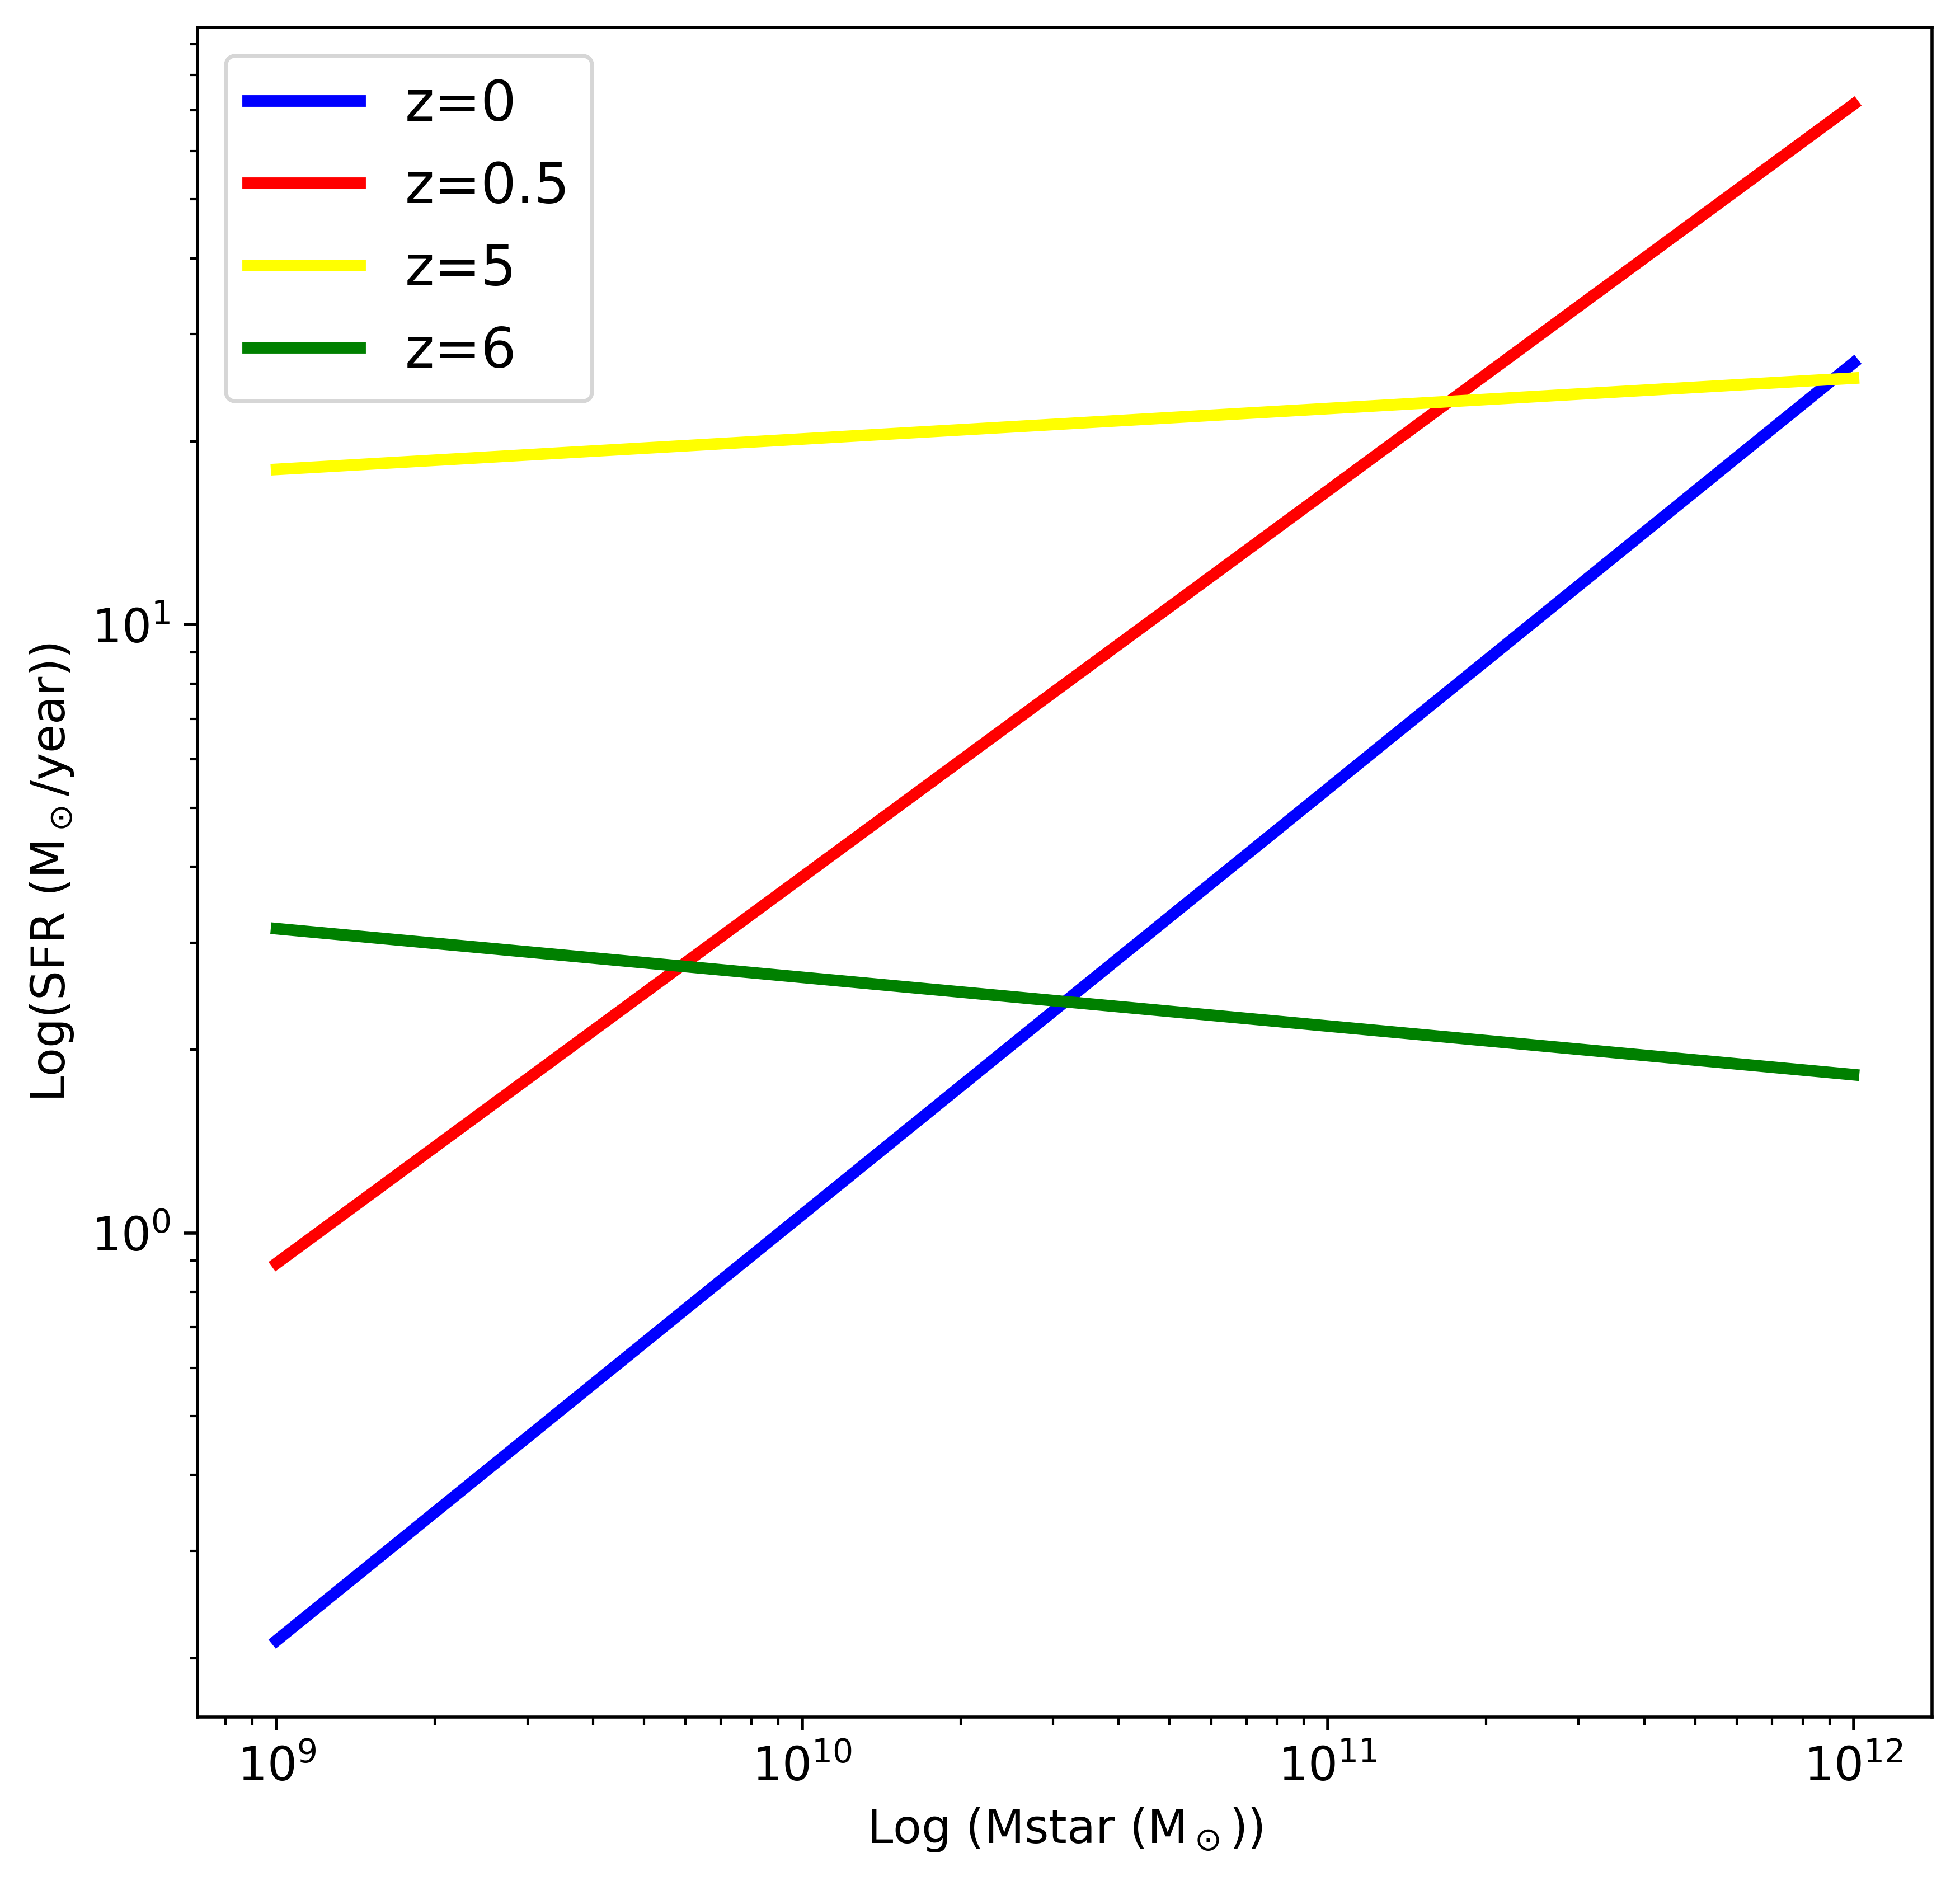

In [21]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.loglog(Mass , 10**SFRMainSequence(Mass,0), color = 'blue' , linewidth = 3, label = 'z=0')
plt.loglog(Mass , 10**SFRMainSequence(Mass,0.5), color = 'red' , linewidth = 3, label = 'z=0.5')
plt.loglog(Mass , 10**SFRMainSequence(Mass,5), color = 'yellow' , linewidth = 3, label = 'z=5')
plt.loglog(Mass , 10**SFRMainSequence(Mass,6), color = 'green' , linewidth = 3, label = 'z=6')

# Add axis labels
plt.xlabel('Log (Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [22]:
# normal galaxies 
TIR_Normal = 1e10 * LsunErgS

print(10**StarFormationRate(TIR_Normal, "TIR"))

1.4892648150381245


In [24]:
# LIRGs  
TIR_LIRG = 1e11 * LsunErgS

print(10**StarFormationRate(TIR_LIRG, "TIR"))

14.892648150381245


In [25]:
# ULIRGs

TIR_ULIRG = 1e12 * LsunErgS

print(10**StarFormationRate(TIR_ULIRG, "TIR"))

148.92648150381245


In [26]:
# HLIRGs
TIR_HLIRG = 1e13 * LsunErgS

print(10**StarFormationRate(TIR_HLIRG, "TIR"))

1489.2648150381244
